# Non-Peptide Angiotensin II Receptor Antagonists for pharmacophore identification

We explore ligands that will be used to create ligand-based pharmacophore models

In [1]:
import openpharmacophore as oph

import nglview as nv
from rdkit import Chem
from rdkit.Chem import Draw

import os
from pprint import pprint
from IPython.display import SVG

## Load  and visualize ligands

We load the ligands from their respective smiles and draw their molecular structures

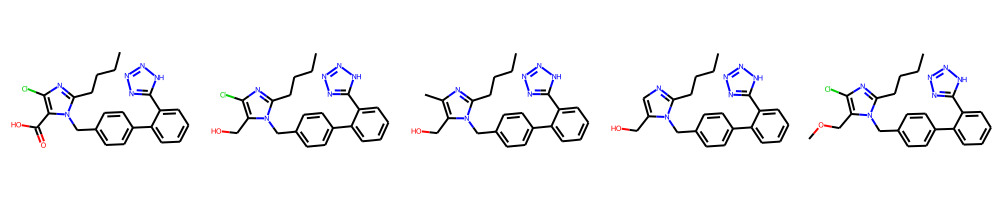

In [2]:
ligands = Chem.SmilesMolSupplier("ligands.smi")
Draw.MolsToGridImage(ligands, molsPerRow=5)

## Preparing the ligands

We'll generate different conformers for each of the ligands and add hydrogens to them
as well.

In [3]:
# Add hydrogens and draw them again

pharmacophore = oph.LigandBasedPharmacophore()
pharmacophore.ligands = ligands
pharmacophore.add_hydrogens(ligands="all")

In [4]:
pharmacophore.generate_conformers(n_confs=-1, ligands="all")

In [5]:
print([l.GetNumConformers() for l in pharmacophore.ligands])

[111, 110, 106, 100, 134]


## View 3D structures

In [6]:
lig_ind = 2
conf_ind = 2
nv.show_rdkit(pharmacophore.ligands[lig_ind], conf_ind=conf_ind)

NGLWidget()

## Chemical features

We find chemical features in the ligands and visualize them.

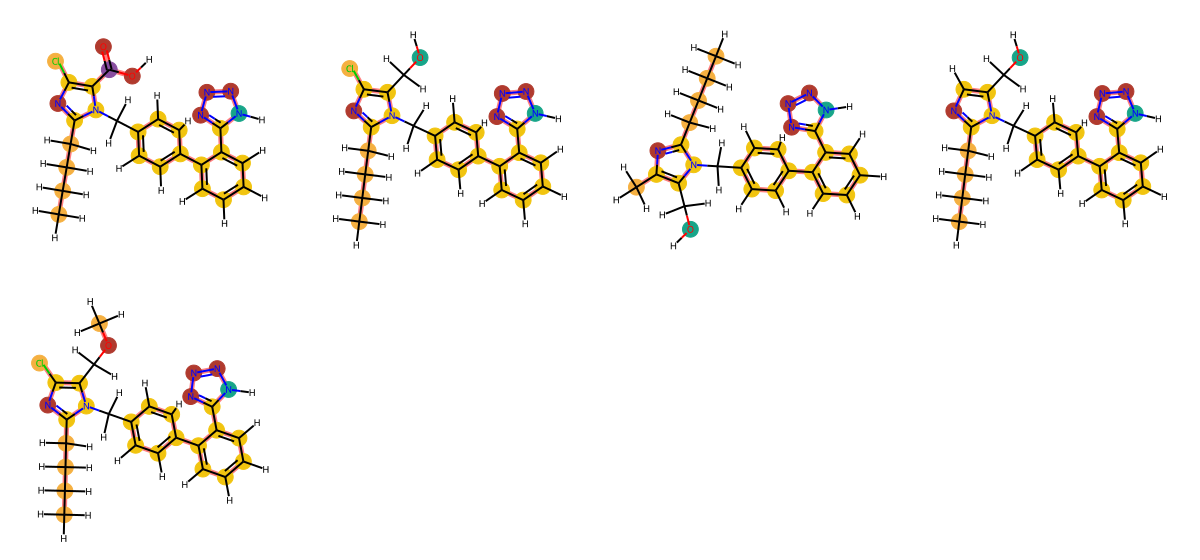

In [8]:
pharmacophore.find_chem_feats()
drawing = pharmacophore.draw((300, 280))
SVG(drawing.GetDrawingText())

## Extracting common pharmacophores

We extract common pharmacophores via recursive distance partitioning algorithm

### Finding 5-Point Pharmacophores

In [9]:
min_actives = len(pharmacophore.ligands)
n_points = 5

In [10]:
pharmacophore.extract(
    n_points=n_points, min_actives=min_actives, max_pharmacophores=10
)
print(f"Found {len(pharmacophore)} common pharmacophores")

Found 10 common pharmacophores


In [11]:
pharmacophore.show(0)

NGLWidget()

### Finding 4-Point Pharmacophores

In [ ]:
min_actives = len(pharmacophore.ligands)
n_points = 4

pharma_4 = oph.LigandBasedPharmacophore()
pharma_4.ligands = pharmacophore.ligands
pharma_4.find_chem_feats()
pharma_4.extract(
    n_points=n_points, min_actives=min_actives, max_pharmacophores=10
)

print(f"Found {len(pharma_4)} common pharmacophores")

In [14]:
pharma_4.show()

NGLWidget()

### Finding 3-Point Pharmacophores

In [ ]:
min_actives = len(pharmacophore.ligands)
n_points = 3

pharma_3 = oph.LigandBasedPharmacophore()
pharma_3.ligands = pharmacophore.ligands
pharma_3.find_chem_feats()
pharma_3.extract(
    n_points=n_points, min_actives=min_actives, max_pharmacophores=10
)

print(f"Found {len(pharma_3)} common pharmacophores")

In [ ]:
pharma_3.show(0)